<a href="https://colab.research.google.com/github/AlvesNelly/projeto_airbnb/blob/main/%5BBuenos_Aires%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Buenos Aires*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Buenos Aires, na Argentina, e ver quais insights podem ser extraídos a partir de dados brutos.**

## 1 - Configurações iniciais e obtenção dos Dados


In [25]:
# Importanto bibliotecas necessárias para a análise
import pandas as pd
import matplotlib as mp
from pandas.io.pytables import IndexCol
import seaborn as sns


In [4]:
# Importando o arquivo listings.csv de Buenos Aires para um DataFrame
df_buenos_aires = pd.read_csv('http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2021-12-25/visualisations/listings.csv')

## 2 - Análise preliminar dos dados e das variáveis


Para um melhor entendimento dos dados contidos no nosso DataFrame, utilizaremos um dicionário de variáveis contendo um breve resumo de cada variável existente no arquivo em questão.

**Dicionário das variáveis**

* ``id`` = Valor inteiro que corresponde à identificação única de cada imóvel. Por ser um valor que identifica cada imóvel, utilizaremos como **chave primária** da nossa análise (index);
* ``name`` = Nome curto exibido como título do anúncio de cada imóvel 
* ``host_id``  = Número de identificação do proprietário do imóvel;
*	``neighbourhood`` = Bairro onde o imóvel esá localizado;
* ``latitude`` = Latitude da localização do imóvel;
*	``longitude`` = Longitude da localização do imóvel;
*	``room_type`` = Especificação de espaço a ser alugado (quarto, espaço inteiro, etc.);
*	``price`` = Valor por noite do imóvel;
*	``minimum_nights`` = Quantidade mínima de noites por imóvel;
*	``number_of_reviews`` = Número de avaliações de cada imóvel;
*	``calculated_host_listings_count`` = Quantidade de anúncios de cada anfitrião;
*	``availability_365`` = Quantidade de dias disponíveis no ano para locação;
*	``number_of_reviews_ltm`` = Quantidade de avaliações dos últimos 12 meses;

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# exibindo as 5 primeiras linhas do arquivo
df_buenos_aires.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6283,Casa Al Sur,13310,Pamela,NaN,Balvanera,-34.60523,-58.41042,Entire home/apt,5113,3,1,2011-01-31,0.01,1,365,0,NaN
1,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,6647,2,27,2021-04-03,0.23,1,236,1,NaN
2,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59777,-58.39664,Private room,2761,1,20,2017-12-11,0.14,1,0,0,NaN
3,13095,Standard Room at Palermo Viejo B&B w pvt Bath,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2893,1,1,2018-12-18,0.03,7,365,0,9789
4,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2893,1,0,NaN,NaN,7,365,0,NaN


É perceptível através da análise das cinco primeiras entradas que a coluna de nome `id` é uma coluna com valores únicos utilizados para identificação de cada imóvel do dataset. 

Por este motivo, realizaremos a indexação desta coluna como valor chave (índice) dos nossos dados.

In [6]:
# transformando coluna id em index
df_buenos_aires.set_index('id', inplace=True)

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [9]:
# identificando o volume de dados do DataFrame
df_buenos_aires.shape

(17318, 17)

In [10]:
# identificando as variáveis
df_buenos_aires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17318 entries, 6283 to 53972049
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            17313 non-null  object 
 1   host_id                         17318 non-null  int64  
 2   host_name                       17305 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   17318 non-null  object 
 5   latitude                        17318 non-null  float64
 6   longitude                       17318 non-null  float64
 7   room_type                       17318 non-null  object 
 8   price                           17318 non-null  int64  
 9   minimum_nights                  17318 non-null  int64  
 10  number_of_reviews               17318 non-null  int64  
 11  last_review                     12078 non-null  object 
 12  reviews_per_month         

In [11]:
# verificando as 5 primeiras entradas do dataset
df_buenos_aires.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
6283,Casa Al Sur,13310,Pamela,NaN,Balvanera,-34.60523,-58.41042,Entire home/apt,5113,3,1,2011-01-31,0.01,1,365,0,NaN
11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,6647,2,27,2021-04-03,0.23,1,236,1,NaN
12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59777,-58.39664,Private room,2761,1,20,2017-12-11,0.14,1,0,0,NaN
13095,Standard Room at Palermo Viejo B&B w pvt Bath,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2893,1,1,2018-12-18,0.03,7,365,0,9789
13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2893,1,0,NaN,NaN,7,365,0,NaN


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [12]:
# ordenando em ordem decrescente as variáveis por seus valores ausentes
df_buenos_aires.isnull().sum().sort_values(ascending=False)

neighbourhood_group               17318
license                           17076
last_review                        5240
reviews_per_month                  5240
host_name                            13
name                                  5
longitude                             0
room_type                             0
host_id                               0
minimum_nights                        0
number_of_reviews                     0
latitude                              0
neighbourhood                         0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
price                                 0
dtype: int64

In [17]:
# identificando quantidade de dados ausentes/nulos na coluna neighbourhood_group
df_buenos_aires.neighbourhood_group.isnull().sum() / df_buenos_aires.shape[0]


1.0

In [18]:
# identificando quantidade de dados ausentes/nulos na coluna license
df_buenos_aires.license.isnull().sum() / df_buenos_aires.shape[0]

0.9860261000115487

In [19]:
# identificando quantidade de dados ausentes/nulos na coluna last_review
df_buenos_aires.last_review.isnull().sum() / df_buenos_aires.shape[0]

0.30257535512183853

In [20]:
# identificando quantidade de dados ausentes/nulos na coluna reviews_per_month
df_buenos_aires.reviews_per_month.isnull().sum() / df_buenos_aires.shape[0]

0.30257535512183853

## 3 - Análise e Limpeza dos dados Ausentes

### 3.1 - Análise de dados ausentes

Nosso dataset possuis variáveis com grande quantidade de dados ausentes, onde:
* Coluna ``neighbourhood_group`` contém **100%** dos seus dados ausentes/nulos;
* Coluna ``license`` contém **98%** de dados ausentes/nulos;
* Coluna ``last_review`` contém **30%** de dados ausentes/nulos;
* Coluna ``reviews_per_month`` contém **30%** de dados ausentes/nulos;
* Coluna ``host_names`` contém apenas **13** entradas ausentes/nulas;
* Coluna ``name`` contém apenas **5** entradas ausentes/nulas;

Embora estes dados não gerem impacto real à nossa análise, dado que as colunas com alta porcentagem de ausência não serão utilizadas, a nível de performance e visualização, essas informações faltantes poderiam diminuir a qualidade dos processamentos caso existissem uma maior quantidade de linhas/dados.

Por este motivo realizaremos a tratativa das colunas com muitos valores ausentes e/ou colunas que não serão análisadas neste projeto.

### 3.2 - Tratando dados Ausentes

Para otimizar nosso dataset, realizaremos a exclusão das colunas ``neighbourhood_group`` e ``license`` por conterem mais de 90% de dados ausentes.

Para esta análise, também não necessitaremos das colunas  ``last_review`` e ``reviews_per_month``. Por este motivo também realizaremos a exclusão dessas informações.

Com relação à coluna ``host_name`` analisaremos se existe indícios do nome do anfitrião pesquisando ocorrência de um mesmo ``host_id`` que contenha valores na coluna de nome do anfitrião. Em caso **afirmativo** substituiremos o valor nulo pelo nome do anfitrião.

In [21]:
# realizando a exclusão da coluna neighbourhood_group
df_buenos_aires = df_buenos_aires.drop('neighbourhood_group', axis=1)

# realizando a exclusão da coluna license
df_buenos_aires = df_buenos_aires.drop('license', axis=1)

# realizando a exclusão da coluna last_review
df_buenos_aires = df_buenos_aires.drop('last_review', axis=1)

# realizando a exclusão da coluna reviews_per_month
df_buenos_aires = df_buenos_aires.drop('reviews_per_month', axis=1)


In [23]:
# verificando se a exclusão das colunas ocorreu de maneira satisfatória
df_buenos_aires.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,,,,,,,,,,,,,
6283,Casa Al Sur,13310,Pamela,Balvanera,-34.60523,-58.41042,Entire home/apt,5113,3,1,1,365,0
11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,Palermo,-34.58184,-58.42415,Entire home/apt,6647,2,27,1,236,1
12463,Room in Recoleta - awesome location,48799,Matt,Recoleta,-34.59777,-58.39664,Private room,2761,1,20,1,0,0
13095,Standard Room at Palermo Viejo B&B w pvt Bath,50994,Ariel,Palermo,-34.59348,-58.42949,Private room,2893,1,1,7,365,0
13096,Standard Room in Palermo Viejo B&B,50994,Ariel,Palermo,-34.59348,-58.42949,Private room,2893,1,0,7,365,0


In [22]:
# exibindo informações do dataset das entradas onde host_name é NaN
df_buenos_aires[df_buenos_aires.host_name.isnull()]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,,,,,,,,,,,,,
4661912,Cama para dos personas,10871683,NaN,Recoleta,-34.589270,-58.390770,Shared room,5113,1,0,1,365,0
18782977,Habitación individual 500 $ por noche San Telmo,130721844,NaN,San Telmo,-34.618660,-58.372240,Private room,500,5,1,3,24,0
20482168,"Super 1 Bedroom Apartment,near tube! Palermo S...",77486799,NaN,Palermo,-34.583560,-58.420880,Entire home/apt,2439,1,58,2,116,1
23680793,Habitación individual baño privado casa compar...,101562668,NaN,Parque Avellaneda,-34.639010,-58.473730,Private room,1350,22,0,1,365,0
23901883,Excel 1 BDR APT COURT Area-Theatres 2 Blocks TUBE,77486799,NaN,San Nicolas,-34.602770,-58.390020,Entire home/apt,3486,1,35,2,295,0
27438808,Apartamento en Palermo,206783480,NaN,Palermo,-34.576570,-58.430180,Entire home/apt,2454,6,21,1,300,0
30333814,Apartamento para 6 personas en San Telmo,130721844,NaN,San Telmo,-34.616380,-58.370560,Entire home/apt,1020,5,0,3,269,0
33442042,"Excelente dto 3 amb todo al frente, cerca de t...",246385359,NaN,Villa Devoto,-34.596900,-58.501570,Entire home/apt,3097,7,24,2,309,7
34414829,"Habitación doble en San Telmo, Buenos Aires.",130721844,NaN,San Telmo,-34.617430,-58.370770,Private room,1900,3,7,3,90,0


In [ ]:
# salvando em variável dados de host_name NaN
host_name_null = df_buenos_aires[df_buenos_aires.host_name.isnull()]

In [ ]:
# analisando incidência de host_name nulo com mesmo host_id de linha que contenha nome do anfitrião


### **Q3. Qual o tipo de distribuição das variáveis?** 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd00282c390>,
      dtype=object)

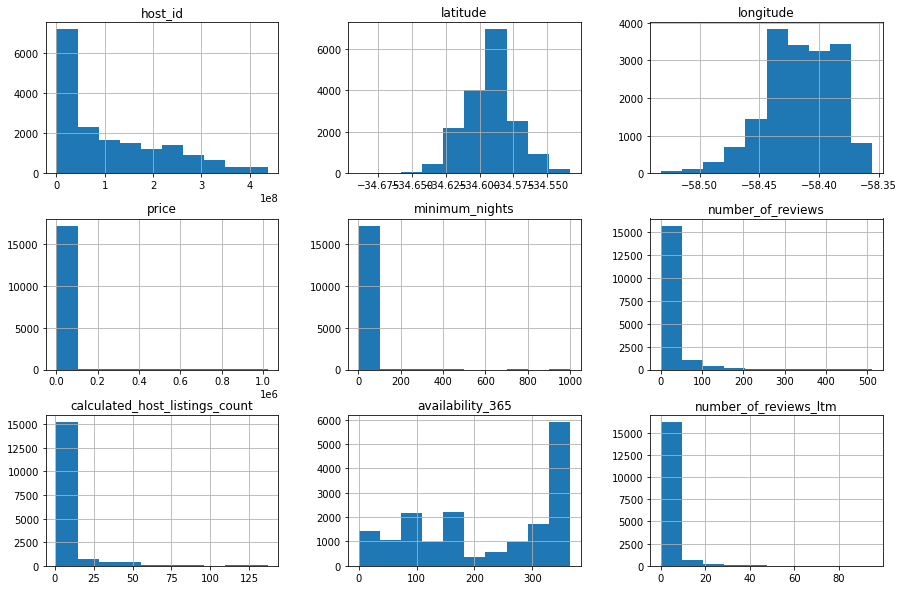

In [38]:
# plotar o histograma das variáveis numéricas
df_buenos_aires.hist(bins=10, figsize=(15,10))

### **Q4. Qual a média dos preços de aluguel?**

In [39]:
# ver a média da coluna `price``
df_buenos_aires.price.describe()

count    1.731800e+04
mean     6.587419e+03
std      3.207039e+04
min      0.000000e+00
25%      2.162000e+03
50%      3.500000e+03
75%      5.624000e+03
max      1.022578e+06
Name: price, dtype: float64

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação

# mostrar a matriz de correlação


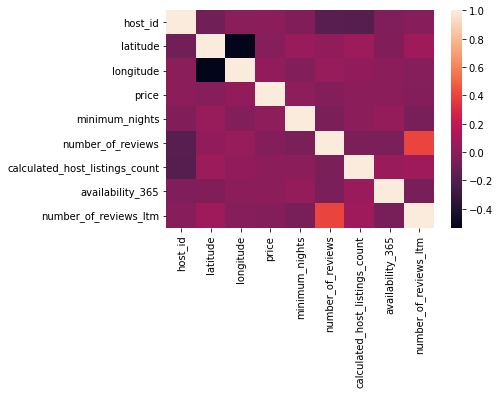

In [43]:
# plotar um heatmap a partir das correlações
sns.heatmap(df_buenos_aires.corr(), annot = False)

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível


In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível


### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média


In [ ]:
# plotar os imóveis pela latitude-longitude


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [47]:
# ver a média da coluna `minimum_nights``
df_buenos_aires.minimum_nights.describe()

count    17318.000000
mean         7.508719
std         24.491571
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max       1000.000000
Name: minimum_nights, dtype: float64

## Conclusões
